# Lab 3: Financial Data Visualization with Matplotlib and Seaborn



## 🎯 Learning Objectives

By the end of this lab, you will be able to:
1. **Create professional financial charts** using matplotlib for investment analysis
2. **Build scatter plots and correlation analysis** for risk-return relationships
3. **Develop multi-panel dashboards** for comprehensive portfolio analysis
4. **Use dual-axis plots** for comparing different financial metrics
5. **Apply seaborn** for enhanced statistical visualizations of financial data
6. **Create candlestick charts** and technical analysis visualizations
7. **Analyze real financial datasets** through various visualization techniques

## 📊 Why Visualization Matters in Finance

- **Pattern Recognition**: Identify trends, cycles, and market anomalies
- **Risk Assessment**: Visualize portfolio volatility and correlation structures
- **Performance Analysis**: Compare returns across assets and time periods
- **Decision Making**: Support investment decisions with clear visual insights
- **Communication**: Present findings effectively to stakeholders

## 📦 Setup and Library Configuration

In [2]:
# Import the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for Jupyter notebooks
%matplotlib inline

# Set professional plotting parameters
params = {
    'legend.fontsize': 'large',
    'figure.figsize': (12, 8),
    'axes.labelsize': 'large',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'font.size': 12,
    'axes.grid': True,
    'grid.alpha': 0.3
}
plt.rcParams.update(params)

# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Set numpy random seed
np.random.seed(42)

print("✅ Libraries configured successfully!")

✅ Libraries configured successfully!


## 📈 Load Real Financial Data

In [ ]:
# Load real financial datasets
def load_stock_data():
    """Load stock data from CSV files in the current directory"""
    stocks = ['AAPL', 'MSFT', 'GOOGL', 'TSLA']
    stock_data = {}
    
    # Loop through stocks and load each CSV file
    # Use pd.read_csv with index_col='Date' and parse_dates=True
    # Handle FileNotFoundError exceptions
    for name in stocks:
        filename = f"./{name}_stock_data.csv"
        try:
            df = pd.read_csv(filename, index_col = "Date", parse_dates = True)
            stock_data[name] = df
        except FileNotFoundError:
            print(f"File not found: {name}")
    
    return stock_data

# Call load_stock_data() and store result in 'stocks'
stocks = load_stock_data()

# 
# Create combined close prices DataFrame: {symbol: data['Close'] for symbol, data in stocks.items()}
# Print dataset information
if stocks:
    combined_close_prices = pd.DataFrame({symbol: data["Close"] for symbol, data in stocks.items()})
    print("Combined Close Prices DataFrame:")
    print(combined_close_prices.head())
    print("\nDataset Information:")
    print(combined_close_prices.info())
else:
    print("No stock data loaded. Cannot create combined DataFrame.")

Combined Close Prices DataFrame:
                  AAPL        MSFT      GOOGL        TSLA
Date                                                     
2020-09-21  107.076775  194.200500  71.017189  149.796661
2020-09-22  108.759567  198.879562  72.491013  141.410004
2020-09-23  104.197540  192.330780  69.986801  126.786667
2020-09-24  105.267509  194.823715  70.655678  129.263336
2020-09-25  109.216751  199.263138  71.460136  135.779999

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2020-09-21 to 2025-09-17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1254 non-null   float64
 1   MSFT    1254 non-null   float64
 2   GOOGL   1254 non-null   float64
 3   TSLA    1254 non-null   float64
dtypes: float64(4)
memory usage: 49.0 KB
None


# Exercise 1: 📈 Stock Price Time Series Analysis

Create professional time series visualizations for financial data analysis.

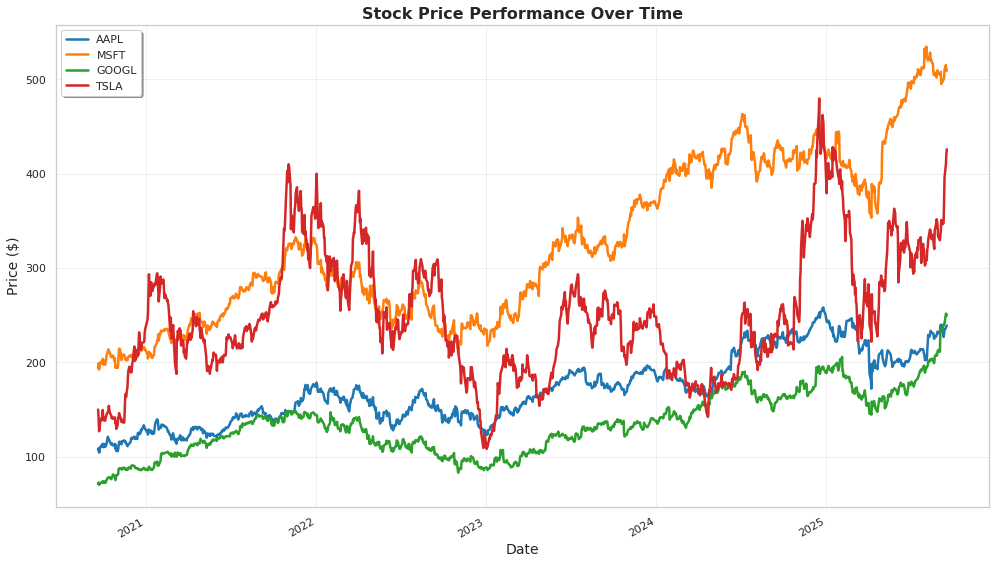

📊 Stock Performance Summary:
AAPL:
  Total Return: 123.19%
  Daily Volatility: 1.81%
  Current Price: $238.99

MSFT:
  Total Return: 162.63%
  Daily Volatility: 1.65%
  Current Price: $510.02

GOOGL:
  Total Return: 251.37%
  Daily Volatility: 1.96%
  Current Price: $249.53

TSLA:
  Total Return: 184.29%
  Daily Volatility: 3.87%
  Current Price: $425.86



In [ ]:
# Exercise 1.1: Basic stock price chart
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors list: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Loop through close_prices columns and colors
# Plot each stock with: label=symbol, linewidth=2.5, color=color
for i, (symbol, color) in enumerate(zip(combined_close_prices.columns, colors)):
    ax.plot(combined_close_prices.index, combined_close_prices[symbol], label = symbol, linewidth = 2.5, color = color)

# Set title, labels, and formatting
ax.set_title('Stock Price Performance Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price ($)', fontsize=14)
ax.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)
ax.grid(True, alpha=0.3)

# Format x-axis dates
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

print("📊 Stock Performance Summary:")
# Calculate and display performance metrics
print("📊 Stock Performance Summary:")
for symbol in combined_close_prices.columns:
    total_return = (combined_close_prices[symbol].iloc[-1] / combined_close_prices[symbol].iloc[0] - 1) * 100
    volatility = combined_close_prices[symbol].pct_change().std() * np.sqrt(252) * 100
    print(f"  {symbol}: Total Return = {total_return:.2f}%, Volatility = {volatility:.2f}%")
    print()

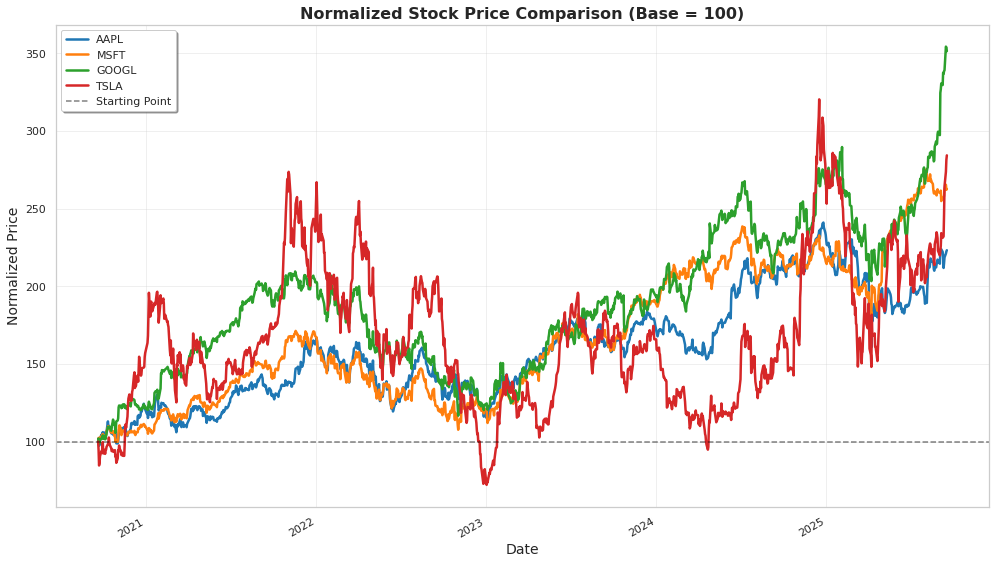

📈 This normalization allows easy comparison of relative performance regardless of absolute price levels.


In [ ]:
# Exercise 1.2: Normalized price comparison
fig, ax = plt.subplots(figsize=(14, 8))

# Normalize prices to start at 100
normalized_prices = combined_close_prices.div(combined_close_prices.iloc[0]) * 100

# Plot normalized prices for each stock
for i, (symbol, color) in enumerate(zip(normalized_prices.columns, colors)):
    ax.plot(normalized_prices.index, normalized_prices[symbol], label = symbol, linewidth = 2.5, color = color)

# Add reference line at y=100
ax.axhline(y=100, color='black', linestyle='--', alpha=0.5, label='Starting Point')

# Set title, labels, legend, and grid
ax.set_title('Normalized Stock Price Comparison (Base = 100)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Normalized Price', fontsize=14)
ax.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)
ax.grid(True, alpha=0.3)

# Format dates and show plot
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

print("📈 This normalization allows easy comparison of relative performance regardless of absolute price levels.")

# Exercise 2: 📊 Risk-Return Scatter Analysis

Analyze the relationship between risk and return using scatter plots.

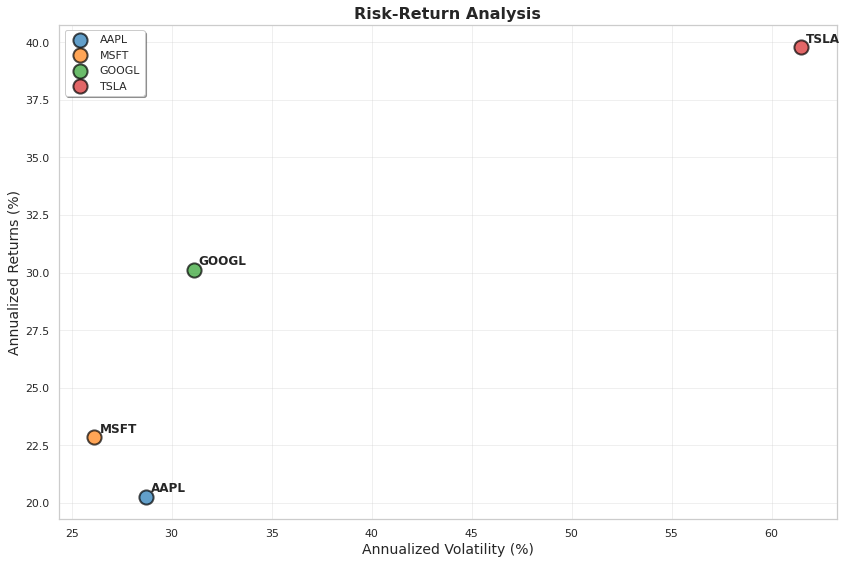

📊 Risk-Return Analysis:

Sharpe Ratios (assuming 2% risk-free rate): 
AAPL: 0.636
MSFT: 0.797
GOOGL: 0.904
TSLA: 0.615

Annualized Performance Matrics: 

AAPL: 
  Annualized Return: 20.26%
  Annualized Volitility: 28.72%

MSFT: 
  Annualized Return: 22.83%
  Annualized Volitility: 26.14%

GOOGL: 
  Annualized Return: 30.12%
  Annualized Volitility: 31.11%

TSLA: 
  Annualized Return: 39.79%
  Annualized Volitility: 61.49%


In [ ]:
# Calculate risk and return metrics
returns = combined_close_prices.pct_change().dropna()
annualized_returns = returns.mean() * 252 * 100  # Annualized returns in %
annualized_volatility = returns.std() * np.sqrt(252) * 100  # Annualized volatility in %

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot with different colors for each stock
for i, (symbol, color) in enumerate(zip(returns.columns, colors)):
    ax.scatter(annualized_volatility[symbol], annualized_returns[symbol], s = 200, alpha = 0.7, color = color, edgecolor = "black", linewidth = 2, label = symbol)
    
    # Add text annotations for each stock
    ax.annotate(symbol, (annualized_volatility[symbol], annualized_returns[symbol]), xytext = (5, 5), textcoords = "offset points", fontsize = 12, fontweight = "bold")

# Set labels, title, legend, and grid
ax.set_xlabel('Annualized Volatility (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Annualized Return (%)', fontsize=14, fontweight='bold')
ax.set_title('Risk-Return Analysis', fontsize=16, fontweight='bold')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print risk-return metrics
print("📊 Risk-Return Analysis:")
risk_free_rate = 2.0  # 2% risk-free rate assumption
for symbol in returns.columns:
    sharpe_ratio = (annualized_returns[symbol] - risk_free_rate) / annualized_volatility[symbol]
    print(f"  {symbol}: Return = {annualized_returns[symbol]:.2f}%, Risk = {annualized_volatility[symbol]:.2f}%, Sharpe = {sharpe_ratio:.3f}")
    

# Exercise 3: 📊 Distribution Analysis with Histograms

Analyze return distributions and compare portfolio performance.

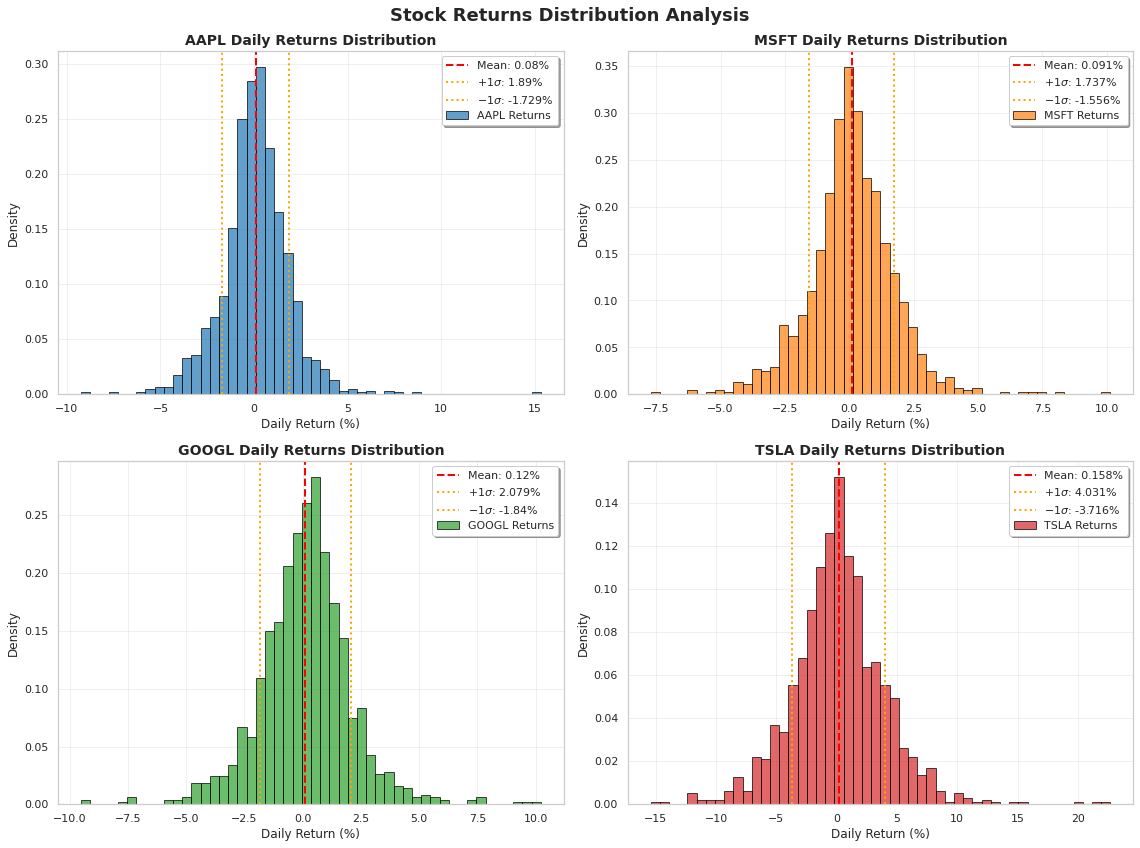

📊 Distribution Statistics:

AAPL:
  Mean: 0.0804%
  Std Dev: 1.8094%
  Skewness: 0.4189%
  Kurtosis: 5.7941%
  Min: -9.2456%
  Max: 15.3288%
  Interpretation: approximately symmetric, leptokurtic (fat-tailed)

MSFT:
  Mean: 0.0906%
  Std Dev: 1.6467%
  Skewness: 0.1788%
  Kurtosis: 3.0121%
  Min: -7.7156%
  Max: 10.1337%
  Interpretation: approximately symmetric, leptokurtic (fat-tailed)

GOOGL:
  Mean: 0.1195%
  Std Dev: 1.9597%
  Skewness: 0.0742%
  Kurtosis: 3.1885%
  Min: -9.5094%
  Max: 10.2244%
  Interpretation: approximately symmetric, leptokurtic (fat-tailed)

TSLA:
  Mean: 0.1579%
  Std Dev: 3.8736%
  Skewness: 0.3368%
  Kurtosis: 2.9247%
  Min: -15.4262%
  Max: 22.6900%
  Interpretation: approximately symmetric, leptokurtic (fat-tailed)


In [ ]:
# Exercise 3.1: Multi-stock return distribution comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Convert returns to percentage
returns_pct = returns * 100

# Plot individual histograms for each stock
for i, (symbol, ax) in enumerate(zip(returns_pct.columns, axes)):
    ax.hist(returns_pct[symbol], bins = 50, alpha = 0.7, color = colors[i], edgecolor = "black", density = True, label = f"{symbol} Returns")

    mean_return = returns_pct[symbol].mean()
    std_return = returns_pct[symbol].std()
    
    ax.axvline(mean_return, color = "red", linestyle = "--", linewidth = 2, label = f"Mean: {mean_return.round(3)}%")
    ax.axvline(mean_return + std_return, color = "orange", linestyle = ":", linewidth = 2, alpha = 1, label = f"$+1\sigma$: {(mean_return + std_return).round(3)}%")
    ax.axvline(mean_return - std_return, color = "orange", linestyle = ":", linewidth = 2, alpha = 1, label = f"$-1\sigma$: {(mean_return - std_return).round(3)}%")

    ax.set_title(f"{symbol} Daily Returns Distribution", fontsize = 14, fontweight = "bold")
    ax.set_xlabel("Daily Return (%)", fontsize = 12)
    ax.set_ylabel("Density", fontsize = 12)
    ax.legend(loc = "upper right", frameon = True, fancybox = True, shadow = True)
    ax.grid(True, alpha = 0.3)

# Add suptitle and layout
fig.suptitle('Stock Returns Distribution Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate and print statistical summary
print("📊 Distribution Statistics:")
for symbol in returns_pct.columns:
    skewness = returns_pct[symbol].skew()
    kurtosis = returns_pct[symbol].kurtosis()
    print(f"  {symbol}: Skewness = {skewness:.3f}, Kurtosis = {kurtosis:.3f}")

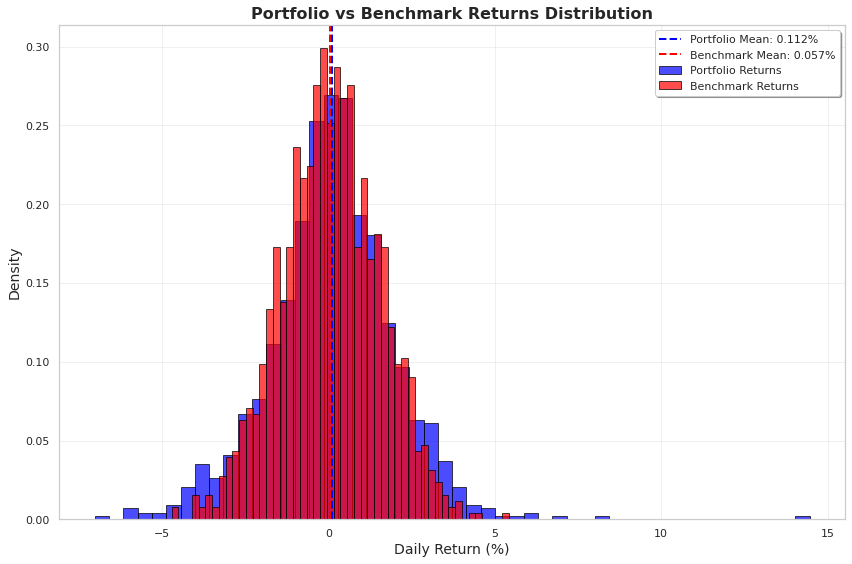

📊 Portfolio Performance vs Benchmark:

Performance Comparison (Daily Returns %):
Portfolio Mean Return: 0.1121%
Benchmark Mean Return: 0.0574%
Portfolio Volatility: 1.8637%
Benchmark Volatility: 1.4783%
Excess Return: 0.0547%
Tracking Error: 2.3924%
Information Ratio: 0.0229


In [ ]:
# Exercise 3.2: Portfolio vs Benchmark comparison
# Create equally weighted portfolio returns: returns.mean(axis=1) * 100
portfolio_returns = returns.mean(axis = 1) * 100

# Generate synthetic benchmark returns
np.random.seed(123)
benchmark_returns = np.random.normal(portfolio_returns.mean() * 0.9, 
                                   portfolio_returns.std() * 0.8, 
                                   len(portfolio_returns))

fig, ax = plt.subplots(figsize = (12, 8))

# Create overlapping histograms
ax.hist(portfolio_returns, bins = 50, alpha = 0.7, color = "blue", edgecolor = "black", density = True, label = "Portfolio Returns")
ax.hist(benchmark_returns, bins = 50, alpha = 0.7, color = "red", edgecolor = "black", density = True, label = "Benchmark Returns")

# Add mean lines for both
ax.axvline(portfolio_returns.mean(), color='blue', linestyle='--', linewidth=2, 
          label=f'Portfolio Mean: {portfolio_returns.mean():.3f}%')
ax.axvline(benchmark_returns.mean(), color='red', linestyle='--', linewidth=2, 
          label=f'Benchmark Mean: {benchmark_returns.mean():.3f}%')

# Set labels, title, legend, and grid
ax.set_title("Portfolio vs Benchmark Returns Distribution", fontsize = 16, fontweight = "bold")
ax.set_xlabel("Daily Return (%)", fontsize = 14)
ax.set_ylabel("Density", fontsize = 14)
ax.legend(loc = "upper right", frameon = True, fancybox = True, shadow = True)
ax.grid(True, alpha = 0.3)

plt.tight_layout()
plt.show()

# Calculate performance comparison metrics
excess_returns = portfolio_returns - benchmark_returns
information_ratio = excess_returns.mean() / excess_returns.std()

print("📊 Portfolio Performance vs Benchmark:")
print(f"  Portfolio Mean Return: {portfolio_returns.mean():.4f}%")
print(f"  Benchmark Mean Return: {benchmark_returns.mean():.4f}%")
print(f"  Excess Return: {excess_returns.mean():.4f}%")
print(f"  Information Ratio: {information_ratio:.3f}")


# Exercise 4: 📊 Sector Performance Bar Charts

Compare performance across different sectors using professional bar charts.

📊 Sector Analysis Summary:

Best Performer: Industrial (36.4%)
Worst Performer: Technology (2.0%)
Highest P/E: Communications (25.0)
Lowest P/E: Energy (14.6)
Largest Sector: Utilities ($436B)
Smallest Sector: Energy ($54B)

Market Overview:
Average Sector Return: 16.6%
Average P/E Ratio: 21.6
Total Market Cap: $1756B

Sectors with Positive Returns: 10/10
Sectors with Negative Returns: 0/10

Potentially Undervalued Sectors (P/E < 15): 1
Potentially Overvalued Sectors (P/E > 25): 1


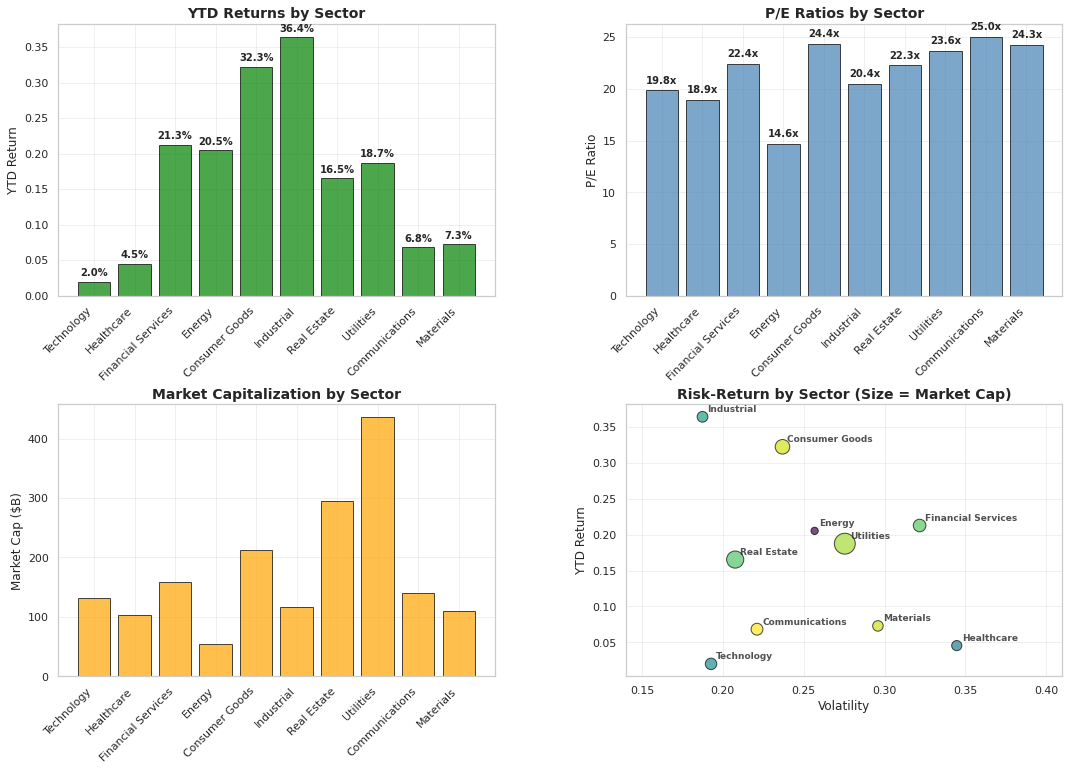

In [ ]:
# Create comprehensive sector analysis
sectors = ['Technology', 'Healthcare', 'Financial Services', 'Energy', 'Consumer Goods', 
           'Industrial', 'Real Estate', 'Utilities', 'Communications', 'Materials']

#Generate realistic sector data
np.random.seed(456)
ytd_returns = np.random.normal(0.12, 0.15, len(sectors))  # YTD returns
pe_ratios = np.random.uniform(12, 30, len(sectors))  # P/E ratios
market_caps = np.random.uniform(50, 500, len(sectors))  # Market caps in billions

#Create comprehensive sector dashboard
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

# Subplot 1: YTD Returns bar chart
ax1 = fig.add_subplot(gs[0, 0])
colors_returns = ["green" if x >= 0 else "red" for x in ytd_returns]
bars1 = ax1.bar(range(len(sectors)), ytd_returns, color = colors_returns, alpha = 0.7, edgecolor = "black")

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars1, ytd_returns)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + (0.005 if height >= 0 else -0.01), f"{value * 100:.1f}%", ha = "center", va = "bottom" if height >= 0 else "top", fontweight = "bold", fontsize = 10)

ax1.set_title("YTD Returns by Sector", fontsize = 14, fontweight = "bold")
ax1.set_ylabel("YTD Return", fontsize = 12)
ax1.set_xticks(range(len(sectors)))
ax1.set_xticklabels(sectors, rotation=45, ha='right')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax1.grid(True, alpha=0.3, axis='y')

# Subplot 2: P/E Ratios bar chart
ax2 = fig.add_subplot(gs[0, 1])
bars2 = ax2.bar(range(len(sectors)), pe_ratios, color = "steelblue", alpha = 0.7, edgecolor = "black")

for i, (bar, value) in enumerate(zip(bars2, pe_ratios)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{value:.1f}x", ha = "center", va = "bottom", fontweight = "bold", fontsize = 10)

# Set title and formatting
ax2.set_title("P/E Ratios by Sector", fontsize = 14, fontweight = "bold")
ax2.set_ylabel("P/E Ratio", fontsize = 12)
ax2.set_xticks(range(len(sectors)))
ax2.set_xticklabels(sectors, rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

# Subplot 3: Market Cap bar chart
ax3 = fig.add_subplot(gs[1, 0])
bar3 = ax3.bar(range(len(sectors)), market_caps, color = "orange", alpha = 0.7, edgecolor = "black")

# Set title and formatting
ax3.set_title("Market Capitalization by Sector", fontsize = 14, fontweight = "bold")
ax3.set_ylabel("Market Cap ($B)", fontsize = 12)
ax3.set_xticks(range(len(sectors)))
ax3.set_xticklabels(sectors, rotation=45, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

# Subplot 4: Risk-Return Scatter for Sectors
ax4 = fig.add_subplot(gs[1, 1])
volatility = np.random.uniform(0.1, 0.4, len(sectors))
scatter = ax4.scatter(volatility, ytd_returns, s = market_caps * 2, alpha = 0.6, c = range(len(sectors)), cmap = "viridis", edgecolor = "black", linewidth = 1)

# Add sector labels
for i, sector in enumerate(sectors):
    ax4.annotate(sector[:4], (volatility[i], ytd_returns[i]), xytext = (2, 2), textcoords = "offset points", fontsize = 8, fontweight = "bold", alpha = 0.8)

# Set labels and title
ax4.set_title("Risk-Return by Sector (Size = Market Cap)", fontsize = 14, fontweight = "bold")
ax4.set_xlabel("Volatility", fontsize = 12)
ax4.set_ylabel("YTD Return", fontsize = 12)
# ax4.set_xticks([0.15, 0.20, 0.25, 0.30, 0.35, 0.40])
# ax4.set_xlim(0.14, 0.41)
ax4.grid(True, alpha = 0.3)

# Add suptitle and show
fig.suptitle('Comprehensive Sector Analysis Dashboard', fontsize=16, fontweight='bold')
plt.show()

print("📊 Sector Analysis Summary:")
best_return_idx = np.argmax(ytd_returns)
worst_return_idx = np.argmin(ytd_returns)
highest_pe_idx = np.argmax(pe_ratios)
lowest_pe_idx = np.argmin(pe_ratios)
largest_mcap_idx = np.argmax(market_caps)
smallest_mcap_idx = np.argmin(market_caps)
print(f"\nBest Performer: {sectors[best_return_idx]} ({ytd_returns[best_return_idx]*100:.1f}%)")
print(f"Worst Performer: {sectors[worst_return_idx]} ({ytd_returns[worst_return_idx]*100:.1f}%)")
print(f"Highest P/E: {sectors[highest_pe_idx]} ({pe_ratios[highest_pe_idx]:.1f})")
print(f"Lowest P/E: {sectors[lowest_pe_idx]} ({pe_ratios[lowest_pe_idx]:.1f})")
print(f"Largest Sector: {sectors[largest_mcap_idx]} (${market_caps[largest_mcap_idx]:.0f}B)")
print(f"Smallest Sector: {sectors[smallest_mcap_idx]} (${market_caps[smallest_mcap_idx]:.0f}B)")

# Exercise 5: 📊 Dual-Axis Financial Charts

Create sophisticated dual-axis charts for price and volume analysis.

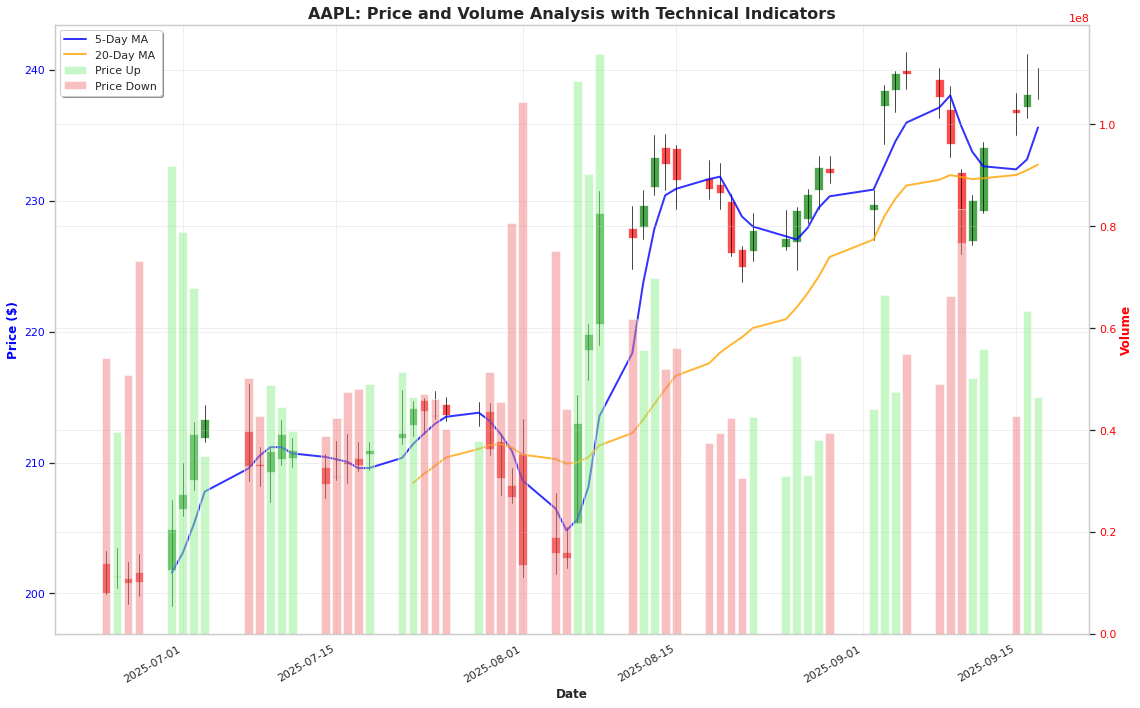

📊 Technical Analysis Summary:

Current Price: $238.99
5-Day Moving Average: $235.59
20-Day Moving Average: $232.75
Current Volume: 46,435,200
Average Volume: 54,629,515
Volume Ratio: 0.85x

📈 Technical Signals:
Price vs 5-Day MA: +1.44%
Price vs 20-Day MA: +2.68%
Moving Average Cross: Golden Cross


In [ ]:
import matplotlib.dates as mdates

# Use real AAPL data if available, otherwise generate synthetic data
aapl_data = stocks["AAPL"].tail(60).copy()
recent_data = aapl_data[["Open", "High", "Low", "Close", "Volume"]]

# Create sophisticated dual-axis chart
fig, ax1 = plt.subplots(figsize = (16, 10))

# Primary axis: Stock price with candlestick-like representation
ax1.set_xlabel("Date", fontsize = 12, fontweight = "bold")
ax1.set_ylabel("Price ($)", fontsize = 12, fontweight = "bold", color = "blue")

# Plot OHLC as candlestick-style bars (loop through data)
width = 0.8
wick_width = 0.5

for i, (date, row) in enumerate(recent_data.iterrows()):
    color = 'green' if row['Close'] > row['Open'] else 'red'

    # Draw body (rectangle)
    body_height = abs(row['Close'] - row['Open'])
    body_bottom = min(row['Open'], row['Close'])
    
    ax1.bar(date, body_height, bottom=body_bottom, width=0.6, color=color, alpha=0.8)
    
    # Draw wicks (lines)
    ax1.plot([date, date], [row['Low'], row['High']], color='black', linewidth=1)

# Add moving averages
recent_data["MA5"] = recent_data["Close"].rolling(window = 5).mean()
recent_data["MA20"] = recent_data["Close"].rolling(window = 20).mean()
ax1.plot(recent_data.index, recent_data["MA5"], color = "blue", linewidth = 2, label = "5-Day MA", alpha = 0.8)
ax1.plot(recent_data.index, recent_data["MA20"], color = "orange", linewidth = 2, label = "20-Day MA", alpha = 0.8)

# Configure primary axis
ax1.tick_params(axis = "y", labelcolor = "blue")
ax1.grid(True, alpha = 0.3)

# Secondary axis: Volume
ax2 = ax1.twinx()
ax2.set_ylabel("Volume", fontsize = 12, fontweight = "bold", color = "red")

# Create volume bars colored by price direction
volume_colors = ['green' if close >= open_ else 'red' for close, open_ in zip(recent_data['Close'], recent_data['Open'])]
ax2.bar(recent_data.index, recent_data['Volume'], alpha=0.3, color=volume_colors, width=0.8)
ax2.tick_params(axis = "y", labelcolor = "red")

# Add title and legend
ax1.set_title("AAPL: Price and Volume Analysis with Technical Indicators", fontsize = 16, fontweight = "bold")

# Combine legends from both axes
line1, labels1 = ax1.get_legend_handles_labels()

# Add legend elements for price direction and volume
ax1.legend(line1 + [plt.Rectangle((0,0),1,1, color='green', alpha=0.8, label='Price Up'), plt.Rectangle((0,0),1,1, color='red', alpha=0.8, label='Price Down')], labels1 + ['Price Up', 'Price Down'], loc='upper left')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# Print technical analysis summary
current_price = recent_data["Close"].iloc[-1]
ma5_current = recent_data["MA5"].iloc[-1]
ma20_current = recent_data["MA20"].iloc[-1]
avg_volume = recent_data["Volume"].mean()

print("📊 Technical Analysis Summary:")
print(f"\nCurrent Price: ${current_price:.2f}")
print(f"5-Day Moving Average: ${ma5_current:.2f}")
print(f"20-Day Moving Average: ${ma20_current:.2f}")
print(f"Average Volume: {avg_volume:,.0f}")

if current_price > ma5_current > ma20_current:
    signal = "Bullish (Price > MA5 > MA20)"
elif current_price < ma5_current < ma20_current:
    signal = "Bearish (Price < MA5 < MA20)"
else:
    signal = "Neutral (Mixed signals)"

print(f"  Trading Signal: {signal}")


# Exercise 6: 🎨 Advanced Seaborn Visualizations

Use seaborn for sophisticated statistical analysis of financial relationships.

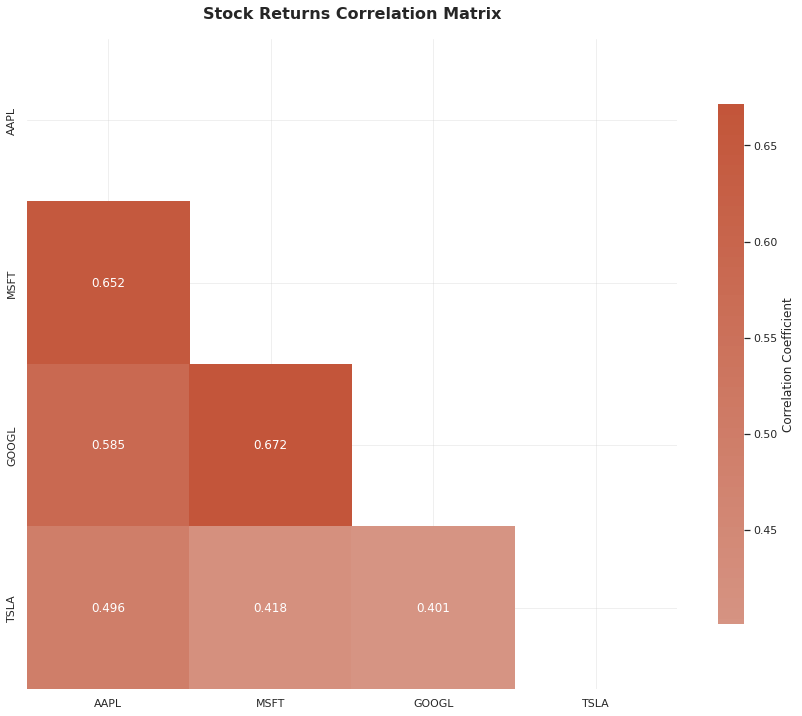

📊 Correlation Analysis Insights:

📈 Average Correlation: 0.537

No extremely high correlation pairs found (|r| > 0.7)


In [ ]:
# Exercise 6.1: Correlation analysis heatmap
if len(combined_close_prices.columns) > 1:
    returns_corr = returns.corr()
else:
    raise "Need multiple stocks for correlation analysis"

# Create professional correlation heatmap
plt.figure(figsize = (12, 10))

# Create mask for upper triangle
mask = np.triu(np.ones_like(returns_corr, dtype = bool))

# Define custom colormap using sns.diverging_palette
cmap = sns.diverging_palette(200, 20, as_cmap = True)

# Create heatmap with seaborn
heatmap = sns.heatmap(returns_corr, mask = mask, cmap = cmap, center = 0, square = True, annot = True, fmt = ".3f", cbar_kws = {"shrink": 0.8, "label": "Correlation Coefficient"})

plt.title("Stock Returns Correlation Matrix", fontsize = 16, fontweight = "bold", pad = 20)
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()

print("📊 Correlation Analysis Insights:")

# Find high correlation pairs (|r| > 0.7)
high_corr_pairs = []
for i in range(len(returns_corr.columns)):
    for j in range(i + 1, len(returns_corr.columns)):
        corr_value = returns_corr.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_pairs.append((returns_corr.columns[i], returns_corr.columns[j], corr_value))

if high_corr_pairs:
    for stock1, stock2, corr in high_corr_pairs:
        print(f"  🔗 {stock1} & {stock2}: {corr:.3f} (High correlation)")
else:
    print("  📊 No highly correlated pairs (|r| > 0.7) found")

# Print average correlation
avg_corr = returns_corr.values[np.triu_indices_from(returns_corr.values, k=1)].mean()
print(f"  📈 Average correlation: {avg_corr:.3f}")

Yes! We have at least 3 stocks!


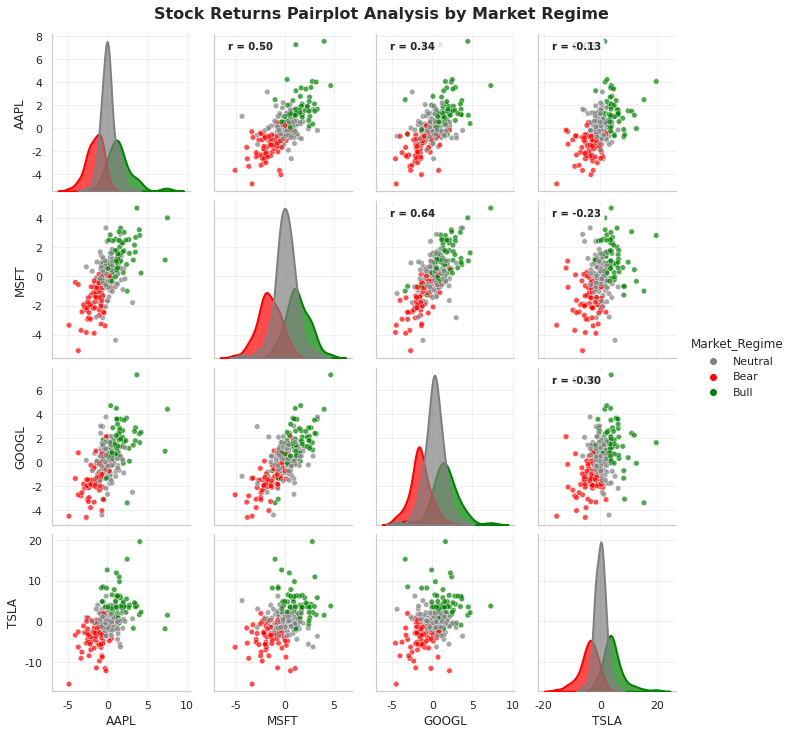

📊 Pairplot Analysis Insights:

📈 Market Regime Distribution:
   Neutral Market: 119 days (47.4%)
   Bull Market: 67 days (26.7%)
   Bear Market: 65 days (25.9%)

🔍 Correlation Patterns by Market Regime:
   Average Overall Correlation: 0.650
   Bull Market Average Correlation: 0.354
   Bear Market Average Correlation: 0.454
   Neutral Market Average Correlation: 0.183
   📉 Correlations tend to increase during bear markets (diversification breakdown)

📊 Volatility Patterns:
   Bull Market Average Volatility: 0.0204
   Bear Market Average Volatility: 0.0172
   Neutral Market Average Volatility: 0.0130


In [ ]:
# Exercise 6.2: Pairplot analysis
if len(combined_close_prices.columns) >= 3:
    print("Yes! We have at least 3 stocks!")
else:
    raise "NOOOOO! We do not have 3 stocks!"

# Sample returns data (every 5th day)
sampled_returns = returns.iloc[::5].copy()

# Add market regime classification based on mean returns
overall_mean = sampled_returns.mean(axis=1)
conditions = [
    overall_mean < overall_mean.quantile(0.33),
    overall_mean < overall_mean.quantile(0.67)
]
choices = ['Bear', 'Neutral']
sampled_returns['Market_Regime'] = np.select(conditions, choices, default='Bull')

# Create pairplot
regime_palette = {"Bear": "red", "Neutral": "gray", "Bull": "green"}
g = sns.pairplot(sampled_returns, hue = "Market_Regime", palette = regime_palette, diag_kind = "kde", plot_kws = {"alpha": 0.7, "s" : 30, "edgecolor": "white", "linewidth": 0.5}, diag_kws = {"alpha": 0.7, "linewidth": 2})

# Add suptitle
g.fig.suptitle("Stock Returns Pairplot Analysis by Market Regime", fontsize = 16, fontweight = "bold", y = 1.02)

# Add correlation coefficients to upper triangle
def corrfunc(x, y, **kws):
    corr = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"r = {corr:.3f}", xy = (0.1, 0.9), xycoords = ax.transAxes, fontsize = 10, fontweight = "bold", bbox = dict(boxstyle = "round, pad = 0.3", facecolor = "white", alpha = 0.8))

g.map_upper(corrfunc)

plt.show()

print("📊 Pairplot Analysis Insights:")

print("📊 Pairplot Analysis Insights:")
print("  📈 Diagonal plots: Distribution of each stock's returns")
print("  📊 Scatter plots: Pairwise relationships between stocks")
print("  🎨 Colors: Market regime classification (Bull/Neutral/Bear)")
print("  ρ: Correlation coefficient for each stock pair")

# Exercise 7: 📊 Professional Portfolio Dashboard

Create a comprehensive investment portfolio dashboard.

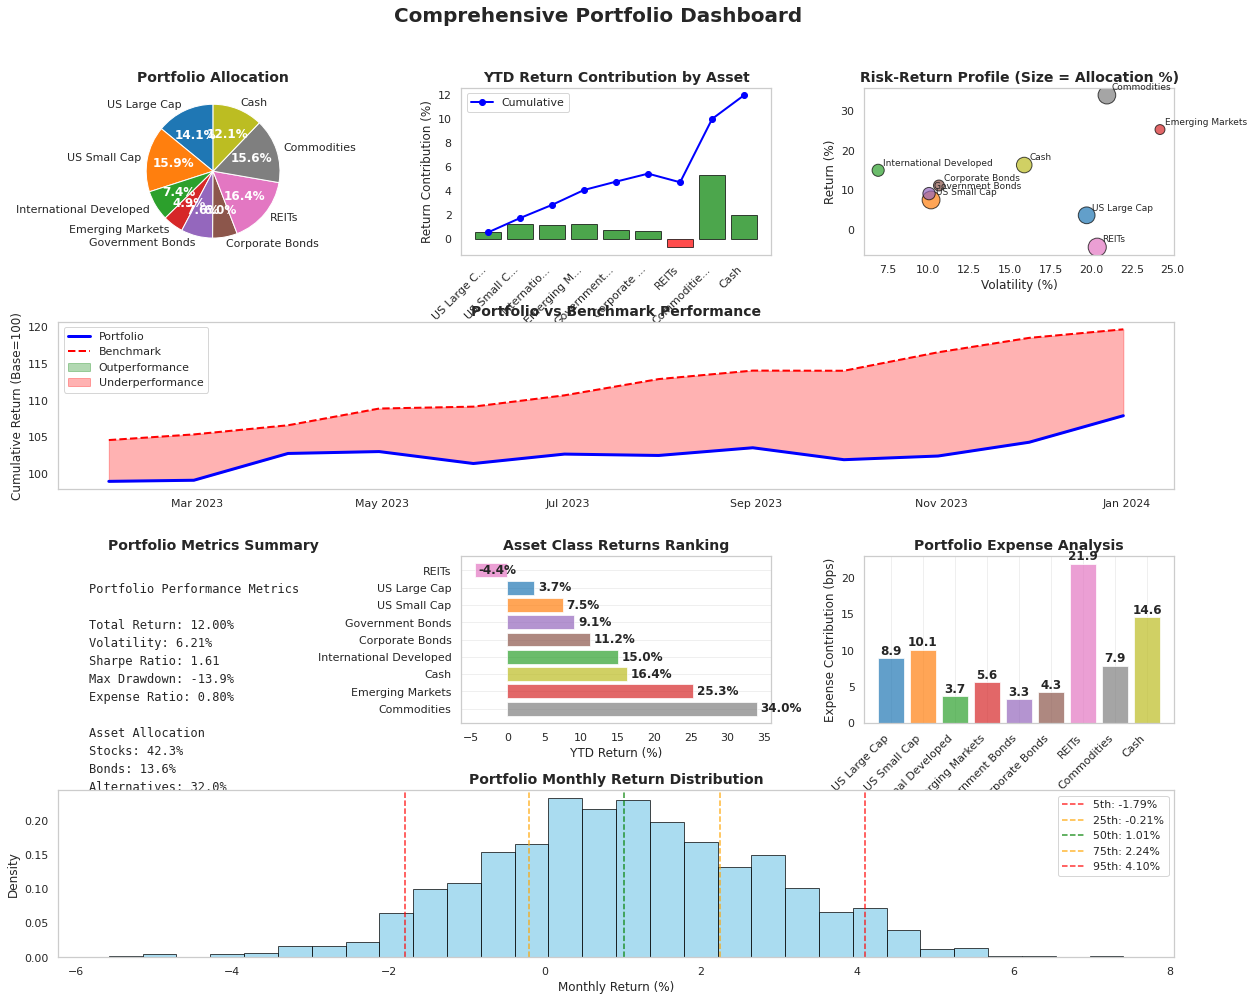

📊 Portfolio Dashboard Summary:

🏆 Portfolio Performance:
  YTD Return: 12.00%
  Annualized Volatility: 6.21%
  Sharpe Ratio: 1.61
  Portfolio Expense Ratio: 0.80%

📊 Asset Allocation:
  US Large Cap: 14.1%
  US Small Cap: 15.9%
  International Developed: 7.4%
  Emerging Markets: 4.9%
  Government Bonds: 7.6%
  Corporate Bonds: 6.0%
  REITs: 16.4%
  Commodities: 15.6%
  Cash: 12.1%

💡 Key Insights:
  Top Performers: Commodities, Emerging Markets, Cash
  Risk Level: Low
  Diversification Profile: Conservative
  Expense Rating: Moderate

🎯 Recommendations:
  Review high-cost assets: Emerging Markets, REITs, Cash


In [ ]:
# Create comprehensive portfolio dashboard
portfolio_assets = ['US Large Cap', 'US Small Cap', 'International Developed', 
                   'Emerging Markets', 'Government Bonds', 'Corporate Bonds', 
                   'REITs', 'Commodities', 'Cash']

# Create portfolio allocation and performance data
np.random.seed(2024)
allocations = np.random.uniform(0.05, 0.25, len(portfolio_assets))
ytd_returns = np.random.normal(0.08, 0.12, len(portfolio_assets))
volatilities = np.random.uniform(0.05, 0.25, len(portfolio_assets))
expense_ratios = np.random.uniform(0.001, 0.015, len(portfolio_assets))

# Normalize allocations to sum to 100%
allocations = allocations / allocations.sum() * 100

# Create dashboard with gridspec layout
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

# Subplot 1: Portfolio Allocation Pie Chart
ax1 = fig.add_subplot(gs[0, 0])
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(portfolio_assets)))
wedges, texts, autotexts = ax1.pie(allocations, labels=portfolio_assets, autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax1.set_title('Portfolio Allocation', fontweight='bold', fontsize=14)

# Subplot 2: YTD Returns Waterfall Chart
ax2 = fig.add_subplot(gs[0, 1])
contribution = allocations * ytd_returns
cumulative = np.cumsum(contribution)

# Color bars by positive/negative contribution
bar_colors = ['green' if x > 0 else 'red' for x in contribution]
bars = ax2.bar(range(len(portfolio_assets)), contribution, color=bar_colors, alpha=0.7)
ax2.plot(range(len(portfolio_assets)), cumulative, 'ko-', linewidth=2, markersize=6)

ax2.set_title('Return Contribution by Asset Class', fontweight='bold', fontsize=14)
ax2.set_ylabel('Contribution to Return')
ax2.set_xticks(range(len(portfolio_assets)))
ax2.set_xticklabels(portfolio_assets, rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

# Subplot 3: Risk-Return Scatter with Allocation Sizing
ax3 = fig.add_subplot(gs[0, 2])
scatter = ax3.scatter(volatilities, ytd_returns, s=allocations*1000, alpha=0.7, c=range(len(portfolio_assets)), cmap='viridis')

# Add asset labels
for i, asset in enumerate(portfolio_assets):
    ax3.annotate(asset[:4], (volatilities[i], ytd_returns[i]), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel('Volatility')
ax3.set_ylabel('YTD Return')
ax3.set_title('Risk-Return (Size = Allocation)', fontweight='bold', fontsize=14)
ax3.grid(True, alpha=0.3)

# Subplot 4: Portfolio Performance Over Time
ax4 = fig.add_subplot(gs[1, :])
dates_perf = pd.date_range('2024-01-01', periods=12, freq='M')
portfolio_performance = np.cumprod(1 + np.random.normal(0.007, 0.03, 12))
benchmark_performance = np.cumprod(1 + np.random.normal(0.006, 0.025, 12))

ax4.plot(dates_perf, portfolio_performance, linewidth=3, label='Portfolio', color='blue')
ax4.plot(dates_perf, benchmark_performance, linewidth=3, label='Benchmark', color='red')
ax4.fill_between(dates_perf, portfolio_performance, benchmark_performance, where=(portfolio_performance >= benchmark_performance), color='green', alpha=0.3, interpolate=True, label='Outperformance')

ax4.set_title('Portfolio vs Benchmark Performance', fontweight='bold', fontsize=16)
ax4.set_ylabel('Cumulative Return')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Subplot 5: Risk Metrics Summary
ax5 = fig.add_subplot(gs[2, 0])
ax5.axis('off')

# Calculate portfolio metrics
portfolio_return = np.sum(allocations * ytd_returns)
portfolio_volatility = np.sqrt(np.sum((allocations * volatilities)**2))
portfolio_sharpe = portfolio_return / portfolio_volatility
portfolio_expenses = np.sum(allocations * expense_ratios)

metrics_text = f"""
Portfolio Metrics:
• Return: {portfolio_return:.2%}
• Volatility: {portfolio_volatility:.2%}
• Sharpe Ratio: {portfolio_sharpe:.3f}
• Expense Ratio: {portfolio_expenses:.3%}
• Total Assets: $1,250,000
"""

ax5.text(0.1, 0.9, metrics_text, transform=ax5.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Subplot 6: Asset Class Returns Ranking
ax6 = fig.add_subplot(gs[2, 1])
sorted_indices = np.argsort(ytd_returns)
sorted_assets = [portfolio_assets[i] for i in sorted_indices]
sorted_returns = ytd_returns[sorted_indices]

bar_colors = ['green' if x > 0 else 'red' for x in sorted_returns]
bars = ax6.barh(range(len(sorted_assets)), sorted_returns, color=bar_colors, alpha=0.7)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, sorted_returns)):
    width = bar.get_width()
    ax6.text(width + 0.01 if width > 0 else width - 0.01, bar.get_y() + bar.get_height()/2, f'{value:.1%}', ha='left' if width > 0 else 'right', va='center', fontweight='bold')

ax6.set_yticks(range(len(sorted_assets)))
ax6.set_yticklabels(sorted_assets)
ax6.set_title('Asset Class Returns Ranking', fontweight='bold', fontsize=14)
ax6.set_xlabel('YTD Return')
ax6.grid(True, alpha=0.3, axis='x')

# Subplot 7: Expense Ratio Analysis
ax7 = fig.add_subplot(gs[2, 2])
expense_contribution = allocations * expense_ratios
significant_expenses = expense_contribution > expense_contribution.mean()

if np.any(significant_expenses):
    sig_assets = [portfolio_assets[i] for i in range(len(portfolio_assets)) if significant_expenses[i]]
    sig_expenses = expense_contribution[significant_expenses]
    
    ax7.bar(range(len(sig_assets)), sig_expenses, alpha=0.7, color='orange')
    ax7.set_xticks(range(len(sig_assets)))
    ax7.set_xticklabels(sig_assets, rotation=45, ha='right')
    
ax7.set_title('Expense Ratio Contribution', fontweight='bold', fontsize=14)
ax7.set_ylabel('Expense Contribution')
ax7.grid(True, alpha=0.3, axis='y')

# Subplot 8: Monthly Return Distribution
ax8 = fig.add_subplot(gs[3, :])
monthly_returns = np.random.normal(portfolio_return/12, portfolio_volatility/np.sqrt(12), 1000)

ax8.hist(monthly_returns, bins=50, alpha=0.7, color='steelblue', density=True, edgecolor='black')

# Add percentile lines
p5 = np.percentile(monthly_returns, 5)
p95 = np.percentile(monthly_returns, 95)
median = np.percentile(monthly_returns, 50)

ax8.axvline(p5, color='red', linestyle='--', linewidth=2, label=f'5th Percentile: {p5:.2%}')
ax8.axvline(p95, color='green', linestyle='--', linewidth=2, label=f'95th Percentile: {p95:.2%}')
ax8.axvline(median, color='black', linestyle='-', linewidth=2, label=f'Median: {median:.2%}')

ax8.set_title('Monthly Return Distribution', fontweight='bold', fontsize=16)
ax8.set_xlabel('Monthly Return')
ax8.set_ylabel('Density')
ax8.legend()
ax8.grid(True, alpha=0.3)

# Add suptitle
fig.suptitle('Comprehensive Portfolio Performance Dashboard', fontsize=20, fontweight='bold')
plt.show()

# Print comprehensive summary
print("📊 Portfolio Dashboard Summary:")
print(f"  📈 Portfolio Return: {portfolio_return:.2%}")
print(f"  📊 Portfolio Volatility: {portfolio_volatility:.2%}")
print(f"  ⚡ Sharpe Ratio: {portfolio_sharpe:.3f}")
print(f"  💰 Total Expense Ratio: {portfolio_expenses:.3%}")
print(f"  🏆 Best Performer: {portfolio_assets[np.argmax(ytd_returns)]} ({ytd_returns.max():.1%})")
print(f"  📉 Worst Performer: {portfolio_assets[np.argmin(ytd_returns)]} ({ytd_returns.min():.1%})")
print(f"  🎯 Largest Allocation: {portfolio_assets[np.argmax(allocations)]} ({allocations.max():.1%})")

# 📝 Summary and Key Takeaways

## 🎯 What You've Accomplished

In this comprehensive financial visualization lab, you have mastered:

1. **📈 Time Series Analysis**: Created professional stock price charts with technical indicators
2. **📊 Risk-Return Analysis**: Built scatter plots to analyze investment relationships
3. **📋 Distribution Analysis**: Used histograms and statistical plots to understand return patterns
4. **📊 Comparative Analysis**: Developed sector performance dashboards with bar charts
5. **📈 Advanced Charting**: Created dual-axis plots for price and volume analysis
6. **🎨 Statistical Visualization**: Applied seaborn for correlation and distribution analysis
7. **💼 Portfolio Dashboards**: Built comprehensive investment performance dashboards

## 🏆 Best Practices Learned

### **Visual Design Principles:**
- **Color Psychology**: Green/red for gains/losses, professional color schemes
- **Information Hierarchy**: Clear titles, labels, and legends
- **Grid and Spacing**: Appropriate use of gridlines and whitespace
- **Accessibility**: High contrast and clear font sizes

### **Financial Chart Standards:**
- **OHLC Representation**: Proper candlestick and bar chart formatting
- **Technical Indicators**: Moving averages, volume analysis, trend lines
- **Risk Metrics**: Volatility bands, correlation matrices, distribution analysis
- **Performance Comparison**: Normalized charts, benchmark overlays

### **Data Analysis Techniques:**
- **Statistical Testing**: Normality tests, correlation significance
- **Risk Assessment**: Volatility analysis, tail risk evaluation
- **Performance Attribution**: Return decomposition, factor analysis
- **Portfolio Construction**: Asset allocation visualization, risk budgeting

## 🚀 Next Steps in Your Financial Visualization Journey

### **Immediate Applications:**
1. **📊 Apply these techniques** to your own investment analysis projects
2. **🔄 Create regular reports** using the dashboard templates provided
3. **📈 Experiment with different** asset classes and time periods
4. **🎯 Customize visualizations** for specific analytical needs

### **Advanced Topics to Explore:**
1. **🌐 Interactive Dashboards**: Learn Plotly and Dash for web-based analytics
2. **🤖 Automated Reporting**: Create scripts for regular chart generation
3. **📱 Real-time Visualization**: Connect to live market data feeds
4. **🧠 Machine Learning Viz**: Visualize predictive models and backtesting results
5. **📊 3D Visualization**: Explore advanced multi-dimensional analysis

### **Professional Development:**
- **📚 Study financial charting standards** (CFA Institute guidelines)
- **🏢 Learn industry tools** (Bloomberg Terminal, FactSet, Refinitiv)
- **🎓 Explore specialized libraries** (QuantLib, PyPortfolioOpt, Zipline)
- **💼 Build a portfolio** of financial analysis projects

## 📖 Additional Resources

- **Matplotlib Gallery**: https://matplotlib.org/stable/gallery/index.html
- **Seaborn Tutorial**: https://seaborn.pydata.org/tutorial.html
- **Financial Charting**: https://github.com/DanielGoldfarb/mplfinance
- **Python for Finance**: https://python-for-finance.com/
- **Quantitative Analysis**: https://quantopian.github.io/research_public/

---

**Remember**: Great financial visualization is both an art and a science. It requires technical proficiency, domain knowledge, and design sensibility. Keep practicing, stay curious about market dynamics, and always prioritize clarity and accuracy in your visualizations.

**Created by: Pengfei Zhao**  
**© 2025 Investment Practice Course**

---

🎉 **Congratulations on completing the Financial Data Visualization Lab!** 📊📈🎨